# Titanic Survival Prediction

## 1. Importing Required Libraries

In [2]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 2. Data Cleaning and Processing

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")
def cleanData(data):
    #Dropping some columns which I think are uneccessary
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    columns = ["SibSp", "Parch", "Fare", "Age"]
    for col in columns:
        data[col].fillna(data[col].median(), inplace=True)

    data.Embarked.fillna("U", inplace=True)
    return data

data = cleanData(data)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Representing labels as numbers

###### **Female: 0, Male: 1**
###### **C: 0, Q: 1, S: 2, U: 3**

In [4]:
lenc = preprocessing.LabelEncoder()
cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = lenc.fit_transform(data[col])
    print(lenc.classes_)

data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Checking if there are no more missing values

In [5]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 3. Exploratory Data Analysis and Data Visualization

In [6]:
#Display number of people who survived and didn't survive.
data['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
#Display number of males and females.
data['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

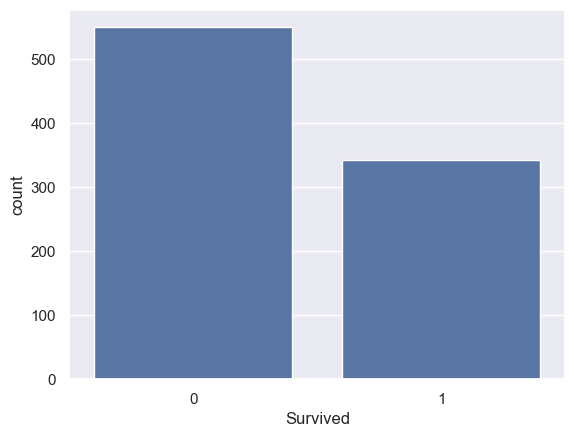

In [8]:
sb.set()
sb.countplot(x='Survived', data = data)

<Axes: xlabel='Sex', ylabel='count'>

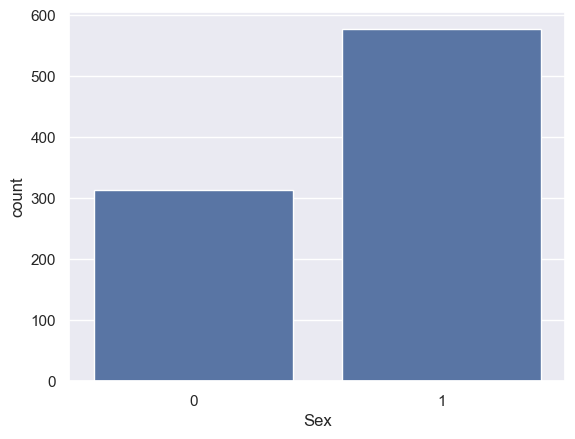

In [9]:
sb.countplot(x='Sex', data = data)

<Axes: xlabel='Pclass', ylabel='count'>

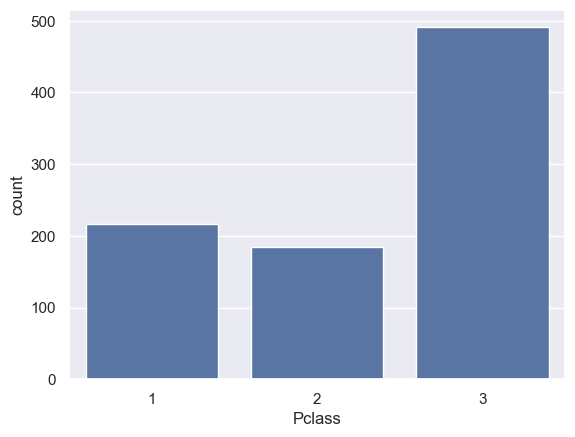

In [10]:
sb.countplot(x='Pclass', data = data)

<Axes: xlabel='Age', ylabel='Count'>

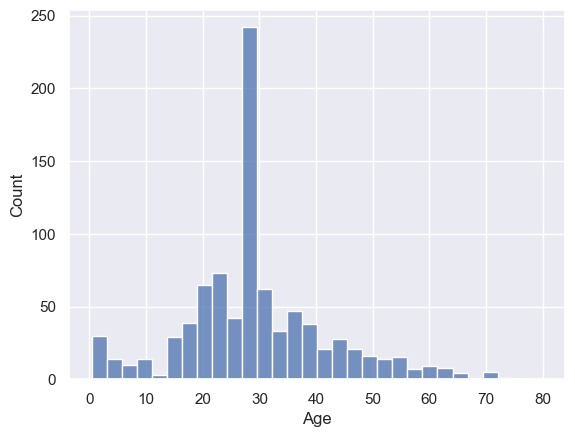

In [11]:
sb.histplot(x='Age', data = data)

<Axes: xlabel='SibSp', ylabel='count'>

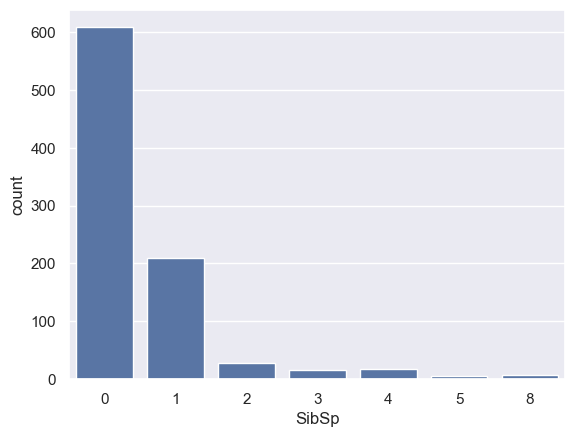

In [12]:
sb.countplot(x='SibSp', data = data)

<Axes: xlabel='Parch', ylabel='count'>

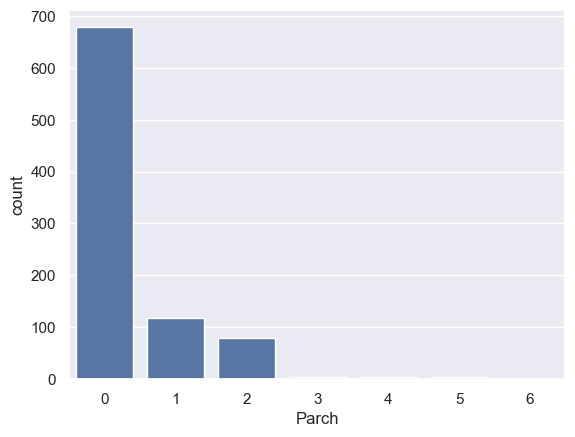

In [13]:
sb.countplot(x='Parch', data = data)

<Axes: xlabel='Sex', ylabel='count'>

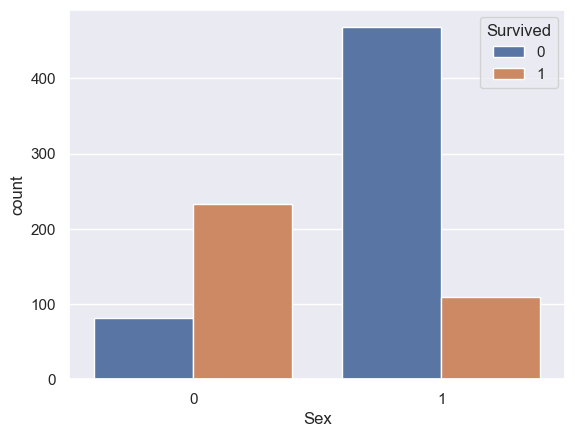

In [14]:
sb.countplot(x='Sex', hue='Survived', data = data)

<Axes: xlabel='Sex', ylabel='count'>

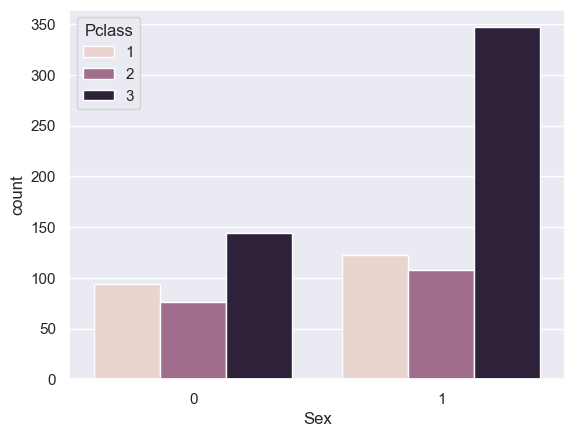

In [15]:
sb.countplot(x='Sex', hue='Pclass', data = data)

<Axes: xlabel='Survived', ylabel='count'>

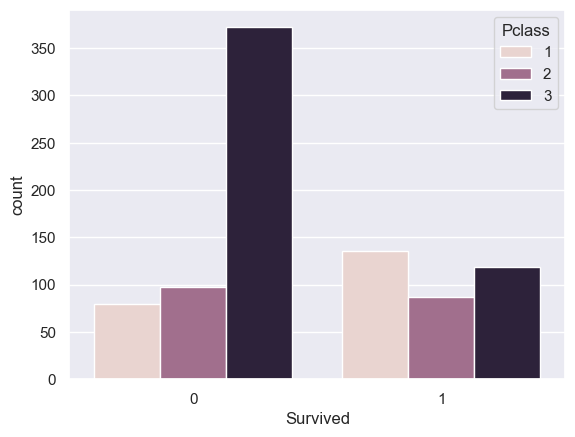

In [16]:
sb.countplot(x='Survived', hue='Pclass', data = data)

<Axes: xlabel='Age', ylabel='Count'>

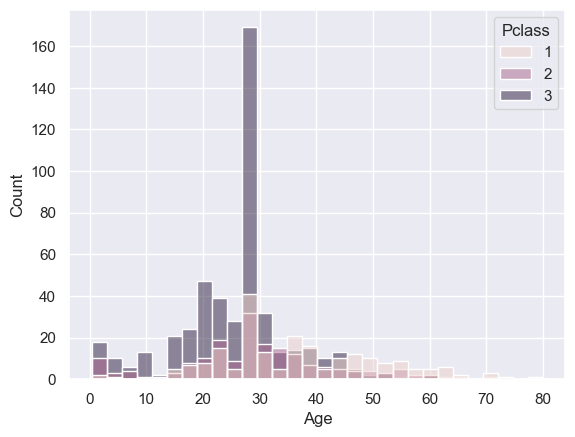

In [17]:
sb.histplot(x='Age', hue='Pclass', data = data)

<Axes: xlabel='SibSp', ylabel='Parch'>

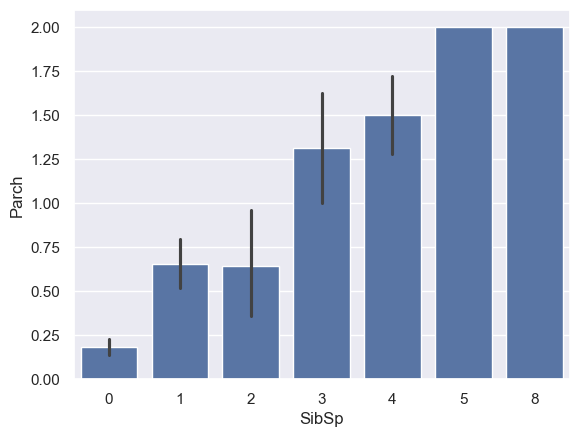

In [18]:
sb.barplot(x='SibSp', y='Parch', data = data)

## 4. Splitting Dataset into Training and Testing Dataset

In [19]:
X = data.drop(columns=['Survived'], axis=1)
y = data['Survived']

In [20]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0  28.0      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns]


In [21]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [22]:
# Considering 2/3rd data for training and remaining for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [23]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(891, 7) (596, 7) (295, 7)
(891,) (596,) (295,)


## 5. Model Training

In [24]:
#Using Logistic Regression
log_model = LogisticRegression()

In [25]:
log_model.fit(X_train, y_train)

LogisticRegression()

## 6. Prediction and Model Accuracy

In [26]:
X_train_predict = log_model.predict(X_train)
print(X_train_predict)

[1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0
 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 

In [27]:
train_accuracy = accuracy_score(y_train, X_train_predict)
print(train_accuracy)

0.8087248322147651


In [28]:
test_predict = log_model.predict(X_test)
print(test_predict)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0]


In [29]:
test_accuracy = accuracy_score(y_test, test_predict)
print(test_accuracy)

0.7762711864406779
